---
# 課題6 - ディープラーニング

本課題で使用するデータセットは[こちら](https://drive.google.com/drive/folders/1PqT4TTZc4TncYyr4jmjY3sKjlTbONVjX)からダウンロードしてください。

GPUを使いたい場合は本ファイルをGoogle Colaboratoryで読み込み使用してください。

使用するデータセットの詳細リンクはそれぞれ下記の通りです。

[dogs-vs-cats-redux-kernels-edition](https://www.kaggle.com/c/dogs-vs-cats-redux-kernels-edition)

[intel-image-classification-dataset](https://www.kaggle.com/puneet6060/intel-image-classification)

前処理
課題1:numpyの形式に直してtrain_test_splitを使いtrainデータとtestデータに分けた。
課題2:imagedatageneratorを使いデータを分けた。前処理をした場合はその画像を表示するとのことだったので、それとは別に水増しと保存をするコードを書いて、表示させた。


---

課題1: データセット「dogs-vs-cats-redux-kernels-edition」を用いて画像から犬猫を判別するモデル（2値分類タスク）を作成せよ

以下の項目をJupyter Notebook上で出力した状態で提出すること

- 前処理を実施した場合、その処理を加えた画像（数枚程度）
- 学習曲線（横軸をEpoch、縦軸をLoss）
- ハイパーパラメータごとのLossを記録し、最も高い性能を出すパラメータを出力
- 予測結果（インプットした画像と予測ラベルを併記する）



まずマウントする

In [2]:
# 以下よりコードを記入してください  ##############################
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


必要なものをimportする

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os, glob
from PIL import Image
from sklearn.model_selection import train_test_split
from keras.utils import np_utils

from keras.applications.vgg16 import VGG16
import numpy as np
from keras.layers import Activation, Convolution2D, Dense, Flatten, MaxPooling2D, BatchNormalization,Dropout,Input
from keras.models import Sequential, load_model, Model
from keras.utils.np_utils import to_categorical
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array, array_to_img
import matplotlib.pyplot as plt
from keras.optimizers import Adam
import pickle
from keras.models import load_model

img_width, img_height = 100,100
image_size=100

classes = ["cat","dog"]
num_classes = len(classes)


trainデータとtestデータに分ける。
データを全て使うと時間がかかりすぎる割に精度はあまり上がらなかったので4000ずつ使うことにした。


In [ ]:
image_size=100
classes = ["cat","dog"]
num_classes = len(classes)


x = []
y = []


for index, class_name in enumerate(classes):
  img_dir =  "/content/drive/My Drive/task/dogs-vs-cats-redux-kernels-edition/dataset/" + class_name
  files = glob.glob(img_dir + "/*.jpg")
  for i, file in enumerate(files):
    if i >= 4000: break
  
    image = Image.open(file)
    image = image.convert("RGB")
    image = image.resize((image_size, image_size))
    data = np.asarray(image)
    
    x.append(data)
    y.append(index)

x = np.array(x)
y = np.array(y)


numpyとしてセーブする。

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y)
xy = (x_train, x_test, y_train, y_test)
np.save("/content/drive/My Drive/task/dogs-vs-cats-redux-kernels-edition/dataset/cat_dog.npy", xy)

NameError: ignored

In [ ]:
xy = np.load("/content/drive/My Drive/task/dogs-vs-cats-redux-kernels-edition/dataset/cat_dog.npy", allow_pickle=True)

In [ ]:
(x_train, x_test, y_train, y_test) = xy

In [ ]:
len(x_test)

2000

In [ ]:
x_train = x_train.astype("float") / 255
x_test  = x_test.astype("float")  / 255

y_train = np_utils.to_categorical(y_train, num_classes)
y_test  = np_utils.to_categorical(y_test, num_classes)

まずcnnのモデルを作る。

In [ ]:
cnn_model = Sequential()

cnn_model.add(Convolution2D(32,(3,3),padding="same", input_shape=(img_width,img_height,3), ))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Convolution2D(32,(3,3),padding="same", input_shape=(img_width,img_height,3)))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Dropout(0.25))


cnn_model.add(Flatten())
cnn_model.add(Dense(512))
cnn_model.add(Activation("relu"))

cnn_model.add(BatchNormalization())

cnn_model.add(Dense(256))
cnn_model.add(Activation("relu"))

cnn_model.add(Dense(128))
cnn_model.add(Activation("relu"))

cnn_model.add(BatchNormalization())
cnn_model.add(Dense(2))
cnn_model.add(Activation("softmax"))

cnn_model.compile(loss="binary_crossentropy",
             optimizer=optimizers.SGD(lr=0.001, momentum=0.9),
             metrics=["accuracy"])

cnn_history = cnn_model.fit(x_train, y_train, batch_size=32, epochs=15, validation_data = (x_test, y_test))

Epoch 1/15
188/188 [==============================] - 3s 15ms/step - loss: 0.7513 - accuracy: 0.5782 - val_loss: 0.6475 - val_accuracy: 0.6255
Epoch 2/15
188/188 [==============================] - 2s 12ms/step - loss: 0.6292 - accuracy: 0.6422 - val_loss: 0.6434 - val_accuracy: 0.6180
Epoch 3/15
188/188 [==============================] - 2s 13ms/step - loss: 0.5864 - accuracy: 0.6818 - val_loss: 0.6204 - val_accuracy: 0.6645
Epoch 4/15
188/188 [==============================] - 2s 13ms/step - loss: 0.5456 - accuracy: 0.7193 - val_loss: 0.6317 - val_accuracy: 0.6540
Epoch 5/15
188/188 [==============================] - 2s 13ms/step - loss: 0.5063 - accuracy: 0.7485 - val_loss: 0.5981 - val_accuracy: 0.6820
Epoch 6/15
188/188 [==============================] - 2s 13ms/step - loss: 0.4538 - accuracy: 0.7853 - val_loss: 0.6846 - val_accuracy: 0.6700
Epoch 7/15
188/188 [==============================] - 2s 13ms/step - loss: 0.4068 - accuracy: 0.8132 - val_loss: 0.6790 - val_accuracy: 0.6825

accとlossを可視化する。

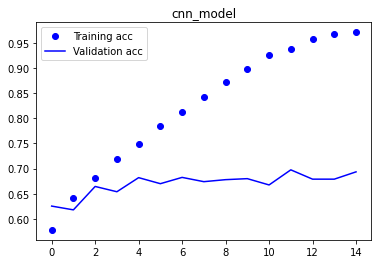

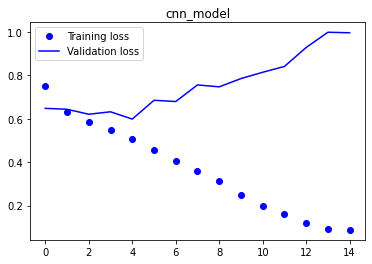

In [ ]:
acc = cnn_history.history['accuracy']
val_acc = cnn_history.history['val_accuracy']
loss = cnn_history.history['loss']
val_loss = cnn_history.history['val_loss']

epochs = range(len(acc))


plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('cnn_model')
plt.legend()


plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('cnn_model')
plt.legend()


結果が微妙だったのでvgg16を使ってモデルを作る。
ここからはハイパーパラメータを変えて調整していく。

In [ ]:
input_tensor = Input(shape=(100,100,3))
vgg16 = VGG16(include_top = False, weights="imagenet", input_tensor=input_tensor)

In [ ]:
top_model = vgg16.output
top_model = Flatten(input_shape=vgg16.output_shape[1:])(top_model)
top_model = Dense(256,activation="sigmoid")(top_model)
top_model = Dropout(0.5)(top_model)
top_model = Dense(2, activation="softmax")(top_model)

vgg16_model = Model(inputs=vgg16.input, outputs=top_model)

for layer in vgg16_model.layers[:19]:
  layer.trainable=False

vgg16_model.compile(loss="categorical_crossentropy",
             optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
             metrics=["accuracy"])

vgg16_history = vgg16_model.fit(x_train, y_train, batch_size=32, epochs=20, validation_data = (x_test, y_test))

NameError: ignored

In [ ]:
top_model = vgg16.output
top_model = Flatten(input_shape=vgg16.output_shape[1:])(top_model)
top_model = Dense(512,activation="sigmoid")(top_model)
top_model = Dropout(0.5)(top_model)
top_model = Dense(256,activation="sigmoid")(top_model)
top_model = Dropout(0.5)(top_model)
top_model = Dense(2, activation="softmax")(top_model)

vgg16_model = Model(inputs=vgg16.input, outputs=top_model)

for layer in vgg16_model.layers[:15]:
  layer.trainable=False

vgg16_model.compile(loss="categorical_crossentropy",
             optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
             metrics=["accuracy"])

vgg16_history = vgg16_model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data = (x_test, y_test))

Epoch 1/10
188/188 [==============================] - 6s 31ms/step - loss: 0.8310 - accuracy: 0.4973 - val_loss: 0.6806 - val_accuracy: 0.6925
Epoch 2/10
188/188 [==============================] - 6s 29ms/step - loss: 0.7923 - accuracy: 0.5097 - val_loss: 0.6696 - val_accuracy: 0.7350
Epoch 3/10
188/188 [==============================] - 6s 29ms/step - loss: 0.7697 - accuracy: 0.5367 - val_loss: 0.6542 - val_accuracy: 0.7815
Epoch 4/10
188/188 [==============================] - 5s 29ms/step - loss: 0.7572 - accuracy: 0.5388 - val_loss: 0.6324 - val_accuracy: 0.7990
Epoch 5/10
188/188 [==============================] - 6s 29ms/step - loss: 0.7241 - accuracy: 0.5658 - val_loss: 0.6017 - val_accuracy: 0.7990
Epoch 6/10
188/188 [==============================] - 6s 29ms/step - loss: 0.6794 - accuracy: 0.6032 - val_loss: 0.5592 - val_accuracy: 0.8140
Epoch 7/10
188/188 [==============================] - 5s 29ms/step - loss: 0.6263 - accuracy: 0.6533 - val_loss: 0.5079 - val_accuracy: 0.8195

In [ ]:
top_model = vgg16.output
top_model = Flatten(input_shape=vgg16.output_shape[1:])(top_model)
top_model = Dense(256,activation="sigmoid")(top_model)
top_model = Dropout(0.8)(top_model)
top_model = Dense(2, activation="softmax")(top_model)

vgg16_model = Model(inputs=vgg16.input, outputs=top_model)

for layer in vgg16_model.layers[:15]:
  layer.trainable=False

vgg16_model.compile(loss="categorical_crossentropy",
             optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
             metrics=["accuracy"])

vgg16_history = vgg16_model.fit(x_train, y_train, batch_size=2, epochs=8, validation_data = (x_test, y_test))

Epoch 1/8
3000/3000 [==============================] - 30s 10ms/step - loss: 0.4517 - accuracy: 0.7902 - val_loss: 0.3045 - val_accuracy: 0.8600
Epoch 2/8
3000/3000 [==============================] - 29s 10ms/step - loss: 0.2728 - accuracy: 0.8858 - val_loss: 0.2466 - val_accuracy: 0.8980
Epoch 3/8
3000/3000 [==============================] - 29s 10ms/step - loss: 0.2214 - accuracy: 0.9080 - val_loss: 0.2341 - val_accuracy: 0.8965
Epoch 4/8
3000/3000 [==============================] - 29s 10ms/step - loss: 0.1870 - accuracy: 0.9252 - val_loss: 0.2449 - val_accuracy: 0.8940
Epoch 5/8
3000/3000 [==============================] - 29s 10ms/step - loss: 0.1535 - accuracy: 0.9407 - val_loss: 0.2516 - val_accuracy: 0.8905
Epoch 6/8
3000/3000 [==============================] - 30s 10ms/step - loss: 0.1157 - accuracy: 0.9537 - val_loss: 0.2642 - val_accuracy: 0.8945
Epoch 7/8
3000/3000 [==============================] - 29s 10ms/step - loss: 0.0861 - accuracy: 0.9682 - val_loss: 0.2608 - val_ac

In [ ]:
top_model = vgg16.output
top_model = Flatten(input_shape=vgg16.output_shape[1:])(top_model)
top_model = Dense(256,activation="sigmoid")(top_model)
top_model = Dropout(0.5)(top_model)
top_model = Dense(2, activation="softmax")(top_model)

vgg16_model = Model(inputs=vgg16.input, outputs=top_model)

for layer in vgg16_model.layers[:15]:
  layer.trainable=False

vgg16_model.compile(loss="categorical_crossentropy",
             optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
             metrics=["accuracy"])

vgg16_history = vgg16_model.fit(x_train, y_train, batch_size=16, epochs=13, validation_data = (x_test, y_test))

Epoch 1/13
375/375 [==============================] - 8s 21ms/step - loss: 0.3086 - accuracy: 0.8648 - val_loss: 0.2618 - val_accuracy: 0.8920
Epoch 2/13
375/375 [==============================] - 8s 20ms/step - loss: 0.2164 - accuracy: 0.9123 - val_loss: 0.3028 - val_accuracy: 0.8750
Epoch 3/13
375/375 [==============================] - 8s 21ms/step - loss: 0.1926 - accuracy: 0.9230 - val_loss: 0.2459 - val_accuracy: 0.8925
Epoch 4/13
375/375 [==============================] - 8s 21ms/step - loss: 0.1772 - accuracy: 0.9297 - val_loss: 0.2467 - val_accuracy: 0.8945
Epoch 5/13
375/375 [==============================] - 8s 21ms/step - loss: 0.1660 - accuracy: 0.9345 - val_loss: 0.2440 - val_accuracy: 0.8995
Epoch 6/13
375/375 [==============================] - 8s 20ms/step - loss: 0.1444 - accuracy: 0.9418 - val_loss: 0.2468 - val_accuracy: 0.9020
Epoch 7/13
375/375 [==============================] - 8s 20ms/step - loss: 0.1333 - accuracy: 0.9477 - val_loss: 0.2488 - val_accuracy: 0.9025

In [ ]:
top_model = vgg16.output
top_model = Flatten(input_shape=vgg16.output_shape[1:])(top_model)
top_model = Dense(256,activation="sigmoid")(top_model)
top_model = Dropout(0.5)(top_model)
top_model = Dense(2, activation="softmax")(top_model)

vgg16_model = Model(inputs=vgg16.input, outputs=top_model)

for layer in vgg16_model.layers[:15]:
  layer.trainable=False

vgg16_model.compile(loss="categorical_crossentropy",
             optimizer=optimizers.SGD(lr=1e-3, momentum=0.9),
             metrics=["accuracy"])

vgg16_history = vgg16_model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data = (x_test, y_test))

Epoch 1/10
188/188 [==============================] - 6s 31ms/step - loss: 0.4644 - accuracy: 0.7682 - val_loss: 0.3003 - val_accuracy: 0.8640
Epoch 2/10
188/188 [==============================] - 5s 29ms/step - loss: 0.2764 - accuracy: 0.8813 - val_loss: 0.2658 - val_accuracy: 0.8820
Epoch 3/10
188/188 [==============================] - 5s 29ms/step - loss: 0.2287 - accuracy: 0.9075 - val_loss: 0.2516 - val_accuracy: 0.8880
Epoch 4/10
188/188 [==============================] - 6s 29ms/step - loss: 0.1946 - accuracy: 0.9222 - val_loss: 0.2558 - val_accuracy: 0.8950
Epoch 5/10
188/188 [==============================] - 5s 29ms/step - loss: 0.1605 - accuracy: 0.9357 - val_loss: 0.2329 - val_accuracy: 0.9005
Epoch 6/10
188/188 [==============================] - 6s 29ms/step - loss: 0.1325 - accuracy: 0.9478 - val_loss: 0.2482 - val_accuracy: 0.9005
Epoch 7/10
188/188 [==============================] - 5s 29ms/step - loss: 0.0975 - accuracy: 0.9633 - val_loss: 0.2619 - val_accuracy: 0.9060

In [ ]:
top_model = vgg16.output
top_model = Flatten(input_shape=vgg16.output_shape[1:])(top_model)
top_model = Dense(256,activation="sigmoid")(top_model)
top_model = Dropout(0.5)(top_model)
top_model = Dense(2, activation="softmax")(top_model)

vgg16_model = Model(inputs=vgg16.input, outputs=top_model)

for layer in vgg16_model.layers[:15]:
  layer.trainable=False

vgg16_model.compile(loss="categorical_crossentropy",
             optimizer=optimizers.SGD(lr=1e-3, momentum=0.9),
             metrics=["accuracy"])

vgg16_history = vgg16_model.fit(x_train, y_train, batch_size=2, epochs=5, validation_data = (x_test, y_test))

Epoch 1/5
3000/3000 [==============================] - 30s 10ms/step - loss: 0.3641 - accuracy: 0.8437 - val_loss: 0.2636 - val_accuracy: 0.8885
Epoch 2/5
3000/3000 [==============================] - 29s 10ms/step - loss: 0.2109 - accuracy: 0.9113 - val_loss: 0.2430 - val_accuracy: 0.8955
Epoch 3/5
3000/3000 [==============================] - 29s 10ms/step - loss: 0.1543 - accuracy: 0.9377 - val_loss: 0.2428 - val_accuracy: 0.9000
Epoch 4/5
3000/3000 [==============================] - 30s 10ms/step - loss: 0.0992 - accuracy: 0.9612 - val_loss: 0.2504 - val_accuracy: 0.8980
Epoch 5/5
3000/3000 [==============================] - 29s 10ms/step - loss: 0.0603 - accuracy: 0.9765 - val_loss: 0.3080 - val_accuracy: 0.8980


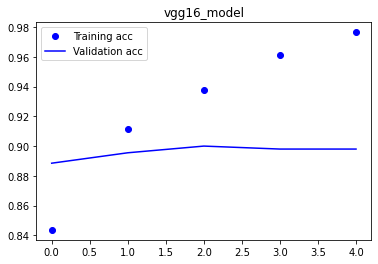

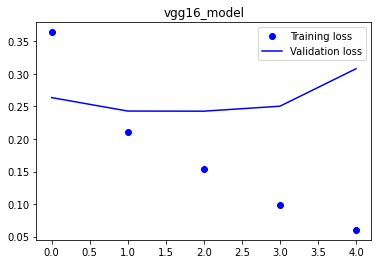

In [ ]:
vgg16_acc = vgg16_history.history['accuracy']
vgg16_val_acc = vgg16_history.history['val_accuracy']
vgg16_loss = vgg16_history.history['loss']
vgg16_val_loss = vgg16_history.history['val_loss']

epochs = range(len(vgg16_acc))


plt.plot(epochs, vgg16_acc, 'bo', label='Training acc')
plt.plot(epochs, vgg16_val_acc, 'b', label='Validation acc')
plt.title('vgg16_model')
plt.legend()


plt.figure()

plt.plot(epochs, vgg16_loss, 'bo', label='Training loss')
plt.plot(epochs, vgg16_val_loss, 'b', label='Validation loss')
plt.title('vgg16_model')
plt.legend()

In [ ]:
top_model = vgg16.output
top_model = Flatten(input_shape=vgg16.output_shape[1:])(top_model)
top_model = Dense(256,activation="sigmoid")(top_model)
top_model = Dropout(0.5)(top_model)
top_model = Dense(2, activation="softmax")(top_model)

vgg16_model = Model(inputs=vgg16.input, outputs=top_model)

for layer in vgg16_model.layers[:15]:
  layer.trainable=False

vgg16_model.compile(loss="categorical_crossentropy",
             optimizer=optimizers.SGD(lr=1e-3, momentum=0.9),
             metrics=["accuracy"])

vgg16_history = vgg16_model.fit(x_train, y_train, batch_size=8, epochs=5, validation_data = (x_test, y_test))

Epoch 1/5
750/750 [==============================] - 13s 17ms/step - loss: 0.3764 - accuracy: 0.8290 - val_loss: 0.2573 - val_accuracy: 0.8885
Epoch 2/5
750/750 [==============================] - 12s 16ms/step - loss: 0.2254 - accuracy: 0.9095 - val_loss: 0.2950 - val_accuracy: 0.8765
Epoch 3/5
750/750 [==============================] - 12s 16ms/step - loss: 0.1604 - accuracy: 0.9358 - val_loss: 0.2448 - val_accuracy: 0.9035
Epoch 4/5
750/750 [==============================] - 12s 16ms/step - loss: 0.1014 - accuracy: 0.9607 - val_loss: 0.3233 - val_accuracy: 0.8850
Epoch 5/5
750/750 [==============================] - 12s 16ms/step - loss: 0.0683 - accuracy: 0.9727 - val_loss: 0.3200 - val_accuracy: 0.8855


In [ ]:
top_model = vgg16.output
top_model = Flatten(input_shape=vgg16.output_shape[1:])(top_model)
top_model = Dense(256,activation="sigmoid")(top_model)
top_model = Dropout(0.5)(top_model)
top_model = Dense(2, activation="softmax")(top_model)

vgg16_model = Model(inputs=vgg16.input, outputs=top_model)

for layer in vgg16_model.layers[:15]:
  layer.trainable=False

vgg16_model.compile(loss="categorical_crossentropy",
             optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
             metrics=["accuracy"])

vgg16_history = vgg16_model.fit(x_train, y_train, batch_size=32, epochs=20, validation_data = (x_test, y_test))

Epoch 1/20
188/188 [==============================] - 10s 55ms/step - loss: 0.7892 - accuracy: 0.5287 - val_loss: 0.5784 - val_accuracy: 0.7735
Epoch 2/20
188/188 [==============================] - 10s 55ms/step - loss: 0.5699 - accuracy: 0.6992 - val_loss: 0.4328 - val_accuracy: 0.8295
Epoch 3/20
188/188 [==============================] - 11s 56ms/step - loss: 0.4228 - accuracy: 0.8077 - val_loss: 0.3672 - val_accuracy: 0.8390
Epoch 4/20
188/188 [==============================] - 10s 55ms/step - loss: 0.3574 - accuracy: 0.8408 - val_loss: 0.3296 - val_accuracy: 0.8575
Epoch 5/20
188/188 [==============================] - 10s 54ms/step - loss: 0.3226 - accuracy: 0.8562 - val_loss: 0.3113 - val_accuracy: 0.8690
Epoch 6/20
188/188 [==============================] - 10s 53ms/step - loss: 0.2958 - accuracy: 0.8735 - val_loss: 0.2987 - val_accuracy: 0.8715
Epoch 7/20
188/188 [==============================] - 10s 53ms/step - loss: 0.2816 - accuracy: 0.8820 - val_loss: 0.2902 - val_accuracy:

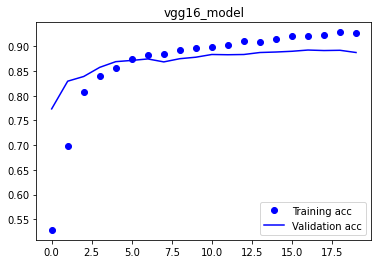

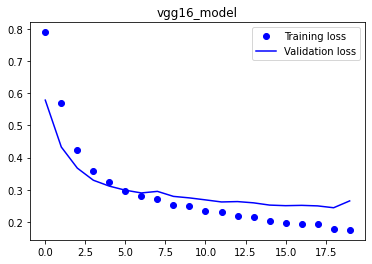

In [ ]:
vgg16_acc = vgg16_history.history['accuracy']
vgg16_val_acc = vgg16_history.history['val_accuracy']
vgg16_loss = vgg16_history.history['loss']
vgg16_val_loss = vgg16_history.history['val_loss']

epochs = range(len(vgg16_acc))


plt.plot(epochs, vgg16_acc, 'bo', label='Training acc')
plt.plot(epochs, vgg16_val_acc, 'b', label='Validation acc')
plt.title('vgg16_model')
plt.legend()


plt.figure()

plt.plot(epochs, vgg16_loss, 'bo', label='Training loss')
plt.plot(epochs, vgg16_val_loss, 'b', label='Validation loss')
plt.title('vgg16_model')
plt.legend()

In [ ]:
pred = np.argmax(vgg16_model.predict(x_test[0:10]), axis=1)
print(pred)

[0 1 0 0 1 0 0 1 0 0]


In [ ]:
top_model = vgg16.output
top_model = Flatten(input_shape=vgg16.output_shape[1:])(top_model)
top_model = Dense(256,activation="sigmoid")(top_model)
top_model = Dropout(0.5)(top_model)
top_model = Dense(2, activation="softmax")(top_model)

vgg16_model = Model(inputs=vgg16.input, outputs=top_model)

for layer in vgg16_model.layers[:15]:
  layer.trainable=False

vgg16_model.compile(loss="categorical_crossentropy",
             optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
             metrics=["accuracy"])

vgg16_history = vgg16_model.fit(x_train, y_train, batch_size=16, epochs=20, validation_data = (x_test, y_test))

Epoch 1/20
375/375 [==============================] - 13s 34ms/step - loss: 0.3679 - accuracy: 0.8322 - val_loss: 0.2835 - val_accuracy: 0.8765
Epoch 2/20
375/375 [==============================] - 13s 34ms/step - loss: 0.2561 - accuracy: 0.8913 - val_loss: 0.2901 - val_accuracy: 0.8760
Epoch 3/20
375/375 [==============================] - 13s 34ms/step - loss: 0.2400 - accuracy: 0.9010 - val_loss: 0.2637 - val_accuracy: 0.8825
Epoch 4/20
375/375 [==============================] - 13s 34ms/step - loss: 0.2247 - accuracy: 0.9065 - val_loss: 0.2708 - val_accuracy: 0.8830
Epoch 5/20
375/375 [==============================] - 13s 34ms/step - loss: 0.2068 - accuracy: 0.9143 - val_loss: 0.2519 - val_accuracy: 0.8940
Epoch 6/20
375/375 [==============================] - 13s 34ms/step - loss: 0.1961 - accuracy: 0.9162 - val_loss: 0.2529 - val_accuracy: 0.8925
Epoch 7/20
375/375 [==============================] - 13s 35ms/step - loss: 0.1888 - accuracy: 0.9233 - val_loss: 0.2399 - val_accuracy:

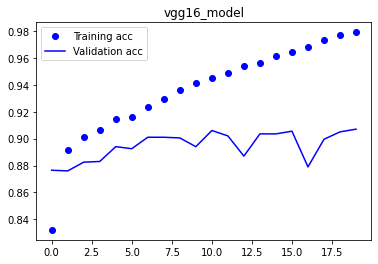

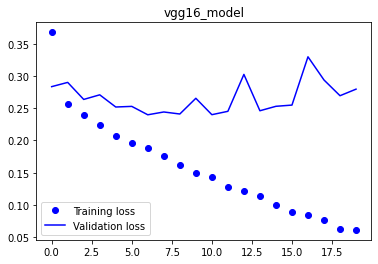

In [ ]:
vgg16_acc = vgg16_history.history['accuracy']
vgg16_val_acc = vgg16_history.history['val_accuracy']
vgg16_loss = vgg16_history.history['loss']
vgg16_val_loss = vgg16_history.history['val_loss']

epochs = range(len(vgg16_acc))


plt.plot(epochs, vgg16_acc, 'bo', label='Training acc')
plt.plot(epochs, vgg16_val_acc, 'b', label='Validation acc')
plt.title('vgg16_model')
plt.legend()


plt.figure()

plt.plot(epochs, vgg16_loss, 'bo', label='Training loss')
plt.plot(epochs, vgg16_val_loss, 'b', label='Validation loss')
plt.title('vgg16_model')
plt.legend()

In [ ]:
top_model = vgg16.output
top_model = Flatten(input_shape=vgg16.output_shape[1:])(top_model)
top_model = Dense(256,activation="sigmoid")(top_model)
top_model = Dropout(0.5)(top_model)
top_model = Dense(2, activation="softmax")(top_model)

vgg16_model = Model(inputs=vgg16.input, outputs=top_model)

for layer in vgg16_model.layers[:15]:
  layer.trainable=False

vgg16_model.compile(loss="categorical_crossentropy",
             optimizer=optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=1e-8, decay=1e-4),
             metrics=["accuracy"])

vgg16_history = vgg16_model.fit(x_train, y_train, batch_size=32, epochs=5, validation_data = (x_test, y_test))

Epoch 1/5
188/188 [==============================] - 10s 53ms/step - loss: 0.4722 - accuracy: 0.7853 - val_loss: 0.3298 - val_accuracy: 0.8505
Epoch 2/5
188/188 [==============================] - 10s 51ms/step - loss: 0.2413 - accuracy: 0.9037 - val_loss: 0.2924 - val_accuracy: 0.8745
Epoch 3/5
188/188 [==============================] - 10s 51ms/step - loss: 0.1441 - accuracy: 0.9408 - val_loss: 0.3214 - val_accuracy: 0.8845
Epoch 4/5
188/188 [==============================] - 10s 52ms/step - loss: 0.0643 - accuracy: 0.9747 - val_loss: 0.3327 - val_accuracy: 0.9000
Epoch 5/5
188/188 [==============================] - 10s 52ms/step - loss: 0.0177 - accuracy: 0.9957 - val_loss: 0.4871 - val_accuracy: 0.9035


In [ ]:
fine_top_model = vgg16.output
fine_top_model = Flatten(input_shape=vgg16.output_shape[1:])(fine_top_model)
fine_top_model = Dense(256,activation="sigmoid")(fine_top_model)
fine_top_model = Dropout(0.5)(fine_top_model)
fine_top_model = Dense(2, activation="softmax")(fine_top_model)

fine_model = Model(inputs=vgg16.input, outputs=fine_top_model)

for layer in vgg16.layers:
  if layer.name.startswith("block5_conv"):
    layer.trainable = True
  else:
    layer.trainable=False

fine_model.compile(loss="categorical_crossentropy",
             optimizer=optimizers.SGD(lr=1e-3, momentum=0.9),
             metrics=["accuracy"])

fine_history = fine_model.fit(x_train, y_train, batch_size=32, epochs=15, validation_data = (x_test, y_test))

Epoch 1/15
188/188 [==============================] - 10s 53ms/step - loss: 0.4645 - accuracy: 0.7703 - val_loss: 0.2977 - val_accuracy: 0.8725
Epoch 2/15
188/188 [==============================] - 10s 51ms/step - loss: 0.2696 - accuracy: 0.8832 - val_loss: 0.2932 - val_accuracy: 0.8735
Epoch 3/15
188/188 [==============================] - 10s 51ms/step - loss: 0.2225 - accuracy: 0.9078 - val_loss: 0.2553 - val_accuracy: 0.8905
Epoch 4/15
188/188 [==============================] - 10s 52ms/step - loss: 0.1881 - accuracy: 0.9250 - val_loss: 0.2547 - val_accuracy: 0.8915
Epoch 5/15
188/188 [==============================] - 10s 52ms/step - loss: 0.1493 - accuracy: 0.9397 - val_loss: 0.2737 - val_accuracy: 0.8815
Epoch 6/15
188/188 [==============================] - 10s 52ms/step - loss: 0.1304 - accuracy: 0.9497 - val_loss: 0.2459 - val_accuracy: 0.8980
Epoch 7/15
188/188 [==============================] - 10s 53ms/step - loss: 0.0956 - accuracy: 0.9658 - val_loss: 0.2450 - val_accuracy:

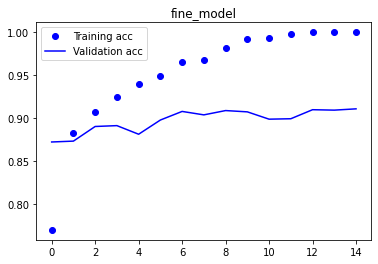

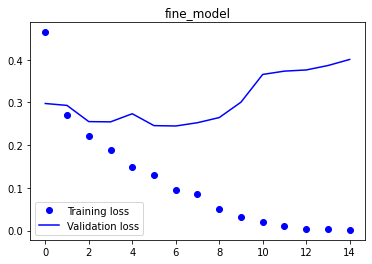

In [ ]:
fine_acc = fine_history.history['accuracy']
fine_val_acc = fine_history.history['val_accuracy']
fine_loss = fine_history.history['loss']
fine_val_loss = fine_history.history['val_loss']

fine_epochs = range(len(fine_acc))


plt.plot(fine_epochs, fine_acc, 'bo', label='Training acc')
plt.plot(fine_epochs, fine_val_acc, 'b', label='Validation acc')
plt.title('fine_model')
plt.legend()


plt.figure()

plt.plot(fine_epochs, fine_loss, 'bo', label='Training loss')
plt.plot(fine_epochs, fine_val_loss, 'b', label='Validation loss')
plt.title('fine_model')
plt.legend()

In [ ]:
top_model = vgg16.output
top_model = Flatten(input_shape=vgg16.output_shape[1:])(top_model)
top_model = Dense(256,activation="sigmoid")(top_model)
top_model = Dropout(0.5)(top_model)
top_model = Dense(2, activation="softmax")(top_model)

vgg16_model = Model(inputs=vgg16.input, outputs=top_model)

for layer in vgg16_model.layers[:15]:
  layer.trainable=False

vgg16_model.compile(loss="categorical_crossentropy",
             optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
             metrics=["accuracy"])

vgg16_history = vgg16_model.fit(x_train, y_train, batch_size=32, epochs=20, validation_data = (x_test, y_test))

Epoch 1/20
188/188 [==============================] - 6s 31ms/step - loss: 0.7551 - accuracy: 0.5433 - val_loss: 0.5739 - val_accuracy: 0.7810
Epoch 2/20
188/188 [==============================] - 6s 29ms/step - loss: 0.5680 - accuracy: 0.7017 - val_loss: 0.4323 - val_accuracy: 0.8160
Epoch 3/20
188/188 [==============================] - 6s 29ms/step - loss: 0.4273 - accuracy: 0.8052 - val_loss: 0.3780 - val_accuracy: 0.8270
Epoch 4/20
188/188 [==============================] - 6s 29ms/step - loss: 0.3601 - accuracy: 0.8392 - val_loss: 0.3337 - val_accuracy: 0.8520
Epoch 5/20
188/188 [==============================] - 6s 30ms/step - loss: 0.3259 - accuracy: 0.8565 - val_loss: 0.3168 - val_accuracy: 0.8595
Epoch 6/20
188/188 [==============================] - 6s 29ms/step - loss: 0.3014 - accuracy: 0.8742 - val_loss: 0.3097 - val_accuracy: 0.8580
Epoch 7/20
188/188 [==============================] - 6s 30ms/step - loss: 0.2855 - accuracy: 0.8767 - val_loss: 0.3032 - val_accuracy: 0.8705

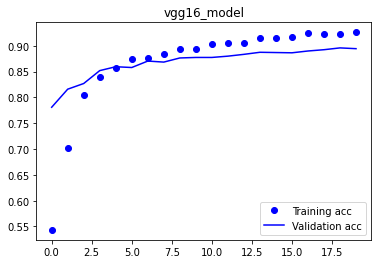

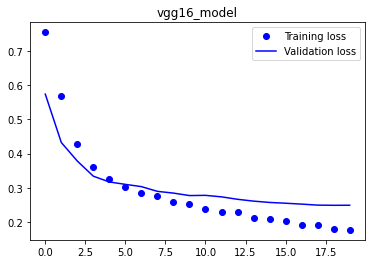

In [ ]:
vgg16_acc = vgg16_history.history['accuracy']
vgg16_val_acc = vgg16_history.history['val_accuracy']
vgg16_loss = vgg16_history.history['loss']
vgg16_val_loss = vgg16_history.history['val_loss']

epochs = range(len(vgg16_acc))


plt.plot(epochs, vgg16_acc, 'bo', label='Training acc')
plt.plot(epochs, vgg16_val_acc, 'b', label='Validation acc')
plt.title('vgg16_model')
plt.legend()


plt.figure()

plt.plot(epochs, vgg16_loss, 'bo', label='Training loss')
plt.plot(epochs, vgg16_val_loss, 'b', label='Validation loss')
plt.title('vgg16_model')
plt.legend()

このモデルが一番良さそうなのでセーブして保存する。

In [ ]:
vgg16_model.save("/content/drive/My Drive/task/dogs-vs-cats-redux-kernels-edition/dataset/vgg16_model.h5")

In [ ]:
vgg16_model = load_model("/content/drive/My Drive/task/dogs-vs-cats-redux-kernels-edition/dataset/vgg16_model.h5")

保存したモデルを使い予測して結果を表示する。

In [ ]:
submmit_dir =  "/content/drive/My Drive/task/dogs-vs-cats-redux-kernels-edition/submmit/" 
submmit_imgs = glob.glob(submmit_dir + "*")

submmit = []

In [ ]:
for i in range(1,10001):
  image = Image.open(submmit_imgs[i])
  image = image.convert("RGB")
  image = image.resize((image_size, image_size))
  data = np.asarray(image)

  submmit.append(data)

submmit = np.array(submmit)
np.save("/content/drive/My Drive/task/dogs-vs-cats-redux-kernels-edition/submmit/submmit.npy", submmit)


In [ ]:
submmit = np.load("/content/drive/My Drive/task/dogs-vs-cats-redux-kernels-edition/submmit/submmit.npy")

In [ ]:
len(submmit)

10000

In [ ]:
pred = np.argmax(vgg16_model.predict(submmit[0:15]), axis=1)
pred_label = []

In [ ]:
def to_label(x):
  if x == 0:
    return "cat"
  else:
    return "dog"

<function matplotlib.pyplot.show>

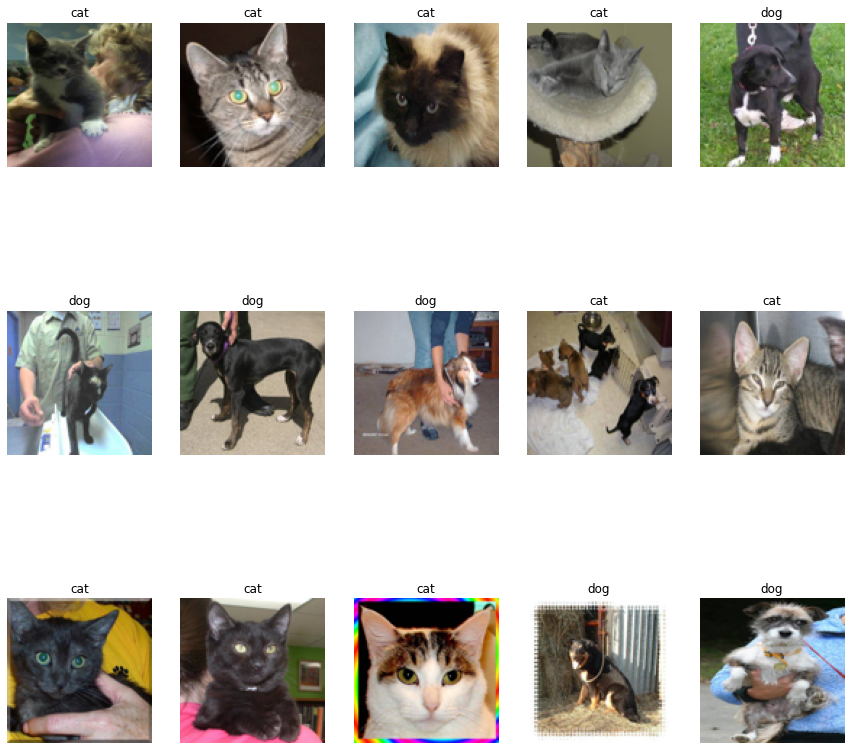

In [ ]:
plt.figure(figsize=(15,15))
for i in range(15):
  plt.subplot(3,5,i+1)
  plt.imshow(submmit[i], "gray")
  plt.axis("off")
  plt.title(to_label(pred[i]))
plt.show


---

課題2: データセット「intel-image-classification-dataset」を用いて画像から建物や森などの風景を判別するモデル（マルチラベル分類）を作成せよ

以下の項目をJupyter Notebook上で出力した状態で提出すること

- 前処理を実施した場合、その処理を加えた画像（数枚程度）
- 学習曲線（横軸をEpoch、縦軸をLoss）
- ハイパーパラメータごとのLossを記録し、最も高い性能を出すパラメータを出力
- 予測結果（インプットした画像と予測ラベルを併記する）

In [ ]:
# 以下よりコードを記入してください  ##############################


画像サイズがバラバラだったので揃える。
enumerateで1つのコードにしようと思ったらエラーが出てしまったので1つずつ書いた





一応、画像の名前の数字がバラバラだったので順番にする

In [ ]:
classes = ["buildings", "forest", "glacier", "sea", "street"]
num_classes = len(classes)




for index, class_name in enumerate(classes):
  img_dir =  "/content/drive/My Drive/task/dogs-vs-cats-redux-kernels-edition/dataset/" + class_name
  files = glob.glob(img_dir + "/*.jpg")
  for f in files:
    img = Image.open(f)
    img_resize = img.resize((image_size, image_size))
    img_resize.save(f)


In [ ]:
path = "/content/drive/My Drive/task/intel-image-classification-dataset/dataset/buildings"
files = glob.glob(path + '/*')

for i, old_name in enumerate(files):
    
    new_name = "/content/drive/My Drive/task/intel-image-classification-dataset/dataset/buildings/{0:00d}.jpg".format(i)
    
    os.rename(old_name, new_name)
    

In [ ]:
path = "/content/drive/My Drive/task/intel-image-classification-dataset/dataset/forest"
files = glob.glob(path + '/*')

for i, old_name in enumerate(files):
   
    new_name = "/content/drive/My Drive/task/intel-image-classification-dataset/dataset/forest/{0:00d}.jpg".format(i)
    
    os.rename(old_name, new_name)
   

In [ ]:
path = "/content/drive/My Drive/task/intel-image-classification-dataset/dataset/glacier"
files = glob.glob(path + '/*')

for i, old_name in enumerate(files):
    
    new_name = "/content/drive/My Drive/task/intel-image-classification-dataset/dataset/glacier/{0:00d}.jpg".format(i)
    
    os.rename(old_name, new_name)

In [ ]:
path = "/content/drive/My Drive/task/intel-image-classification-dataset/dataset/mountain"
files = glob.glob(path + '/*')

for i, old_name in enumerate(files):
   
    new_name = "/content/drive/My Drive/task/intel-image-classification-dataset/dataset/mountain/{0:00d}.jpg".format(i)
  
    os.rename(old_name, new_name)

In [ ]:
path = "/content/drive/My Drive/task/intel-image-classification-dataset/dataset/sea"
files = glob.glob(path + '/*')

for i, old_name in enumerate(files):
    
    new_name = "/content/drive/My Drive/task/intel-image-classification-dataset/dataset/sea/{0:00d}.jpg".format(i + 1)
   
    os.rename(old_name, new_name)

In [ ]:
path = "/content/drive/My Drive/task/intel-image-classification-dataset/dataset/street"
files = glob.glob(path + '/*')

for i, old_name in enumerate(files):
    
    new_name = "/content/drive/My Drive/task/intel-image-classification-dataset/dataset/street/{0:00d}.jpg".format(i)
 
    os.rename(old_name, new_name)

2つずつ画像の水増しをして保存する。

In [ ]:
def draw_images(generator, x, output_dir, index):
   
    save_name = 'extened-' + str(index)
    g = generator.flow(x, batch_size=1, save_to_dir=output_dir, save_prefix=save_name, save_format='jpg')

    for i in range(2):
        bach = g.next()

generator = ImageDataGenerator(
                    rotation_range=45, 
                    width_shift_range=0.2, 
                    height_shift_range=0.3, 
                    channel_shift_range=150.0, 
                    shear_range=0.39, 
                    horizontal_flip=True, 
                    vertical_flip=True 
                    )

In [ ]:
img_dir =  "/content/drive/My Drive/task/intel-image-classification-dataset/dataset/street" 
files = glob.glob(img_dir + "/*")

for i in range(len(files)):
  img = load_img(files[i])
       
  x = img_to_array(img)
  x = np.expand_dims(x, axis=0)
      
  draw_images(generator, x, img_dir, i)

In [3]:
train_data_dir = "/content/drive/My Drive/task/intel-image-classification-dataset/dataset"
batch_size = 18


In [4]:
input_tensor = Input(shape=(100,100,3))
vgg16 = VGG16(include_top = False, weights="imagenet", input_tensor=input_tensor)


58892288/58889256 [==============================] - 1s 0us/step


In [5]:
top_model = vgg16.output
top_model = Flatten(input_shape=vgg16.output_shape[1:])(top_model)
top_model = Dense(256,activation="sigmoid")(top_model)
top_model = Dropout(0.5)(top_model)
top_model = Dense(6, activation="softmax")(top_model)

vgg16_model = Model(inputs=vgg16.input, outputs=top_model)

for layer in vgg16_model.layers[:15]:
  layer.trainable=False

vgg16_model.compile(loss="categorical_crossentropy",
             optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
             metrics=["accuracy"])

In [6]:
train_datagen = ImageDataGenerator(
    rotation_range=45, 
    width_shift_range=0.2, 
    height_shift_range=0.2, 
    shear_range=0.1, 
    zoom_range=0.1, 
    horizontal_flip=True, 
    vertical_flip=True, 
    rescale=1.0 / 255, 
    validation_split=0.2
    )

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(image_size, image_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training') 

validation_generator = train_datagen.flow_from_directory(
    train_data_dir, 
    target_size=(image_size, image_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation') 


Found 29565 images belonging to 6 classes.
Found 7388 images belonging to 6 classes.


In [7]:
vgg16_history = vgg16_model.fit_generator(train_generator,
                              steps_per_epoch=train_generator.samples // batch_size,
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps = validation_generator.samples // batch_size)


vgg16_acc = vgg16_history.history['accuracy']
vgg16_val_acc = vgg16_history.history['val_accuracy']
vgg16_loss = vgg16_history.history['loss']
vgg16_val_loss = vgg16_history.history['val_loss']

epochs = range(len(vgg16_acc))


plt.plot(epochs, vgg16_acc, 'bo', label='Training acc')
plt.plot(epochs, vgg16_val_acc, 'b', label='Validation acc')
plt.title('vgg16_model')
plt.legend()


plt.figure()

plt.plot(epochs, vgg16_loss, 'bo', label='Training loss')
plt.plot(epochs, vgg16_val_loss, 'b', label='Validation loss')
plt.title('vgg16_model')
plt.legend()

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
 320/1642 [====>.........................] - ETA: 2:03:50 - loss: 1.7944 - accuracy: 0.2743

UnknownError: ignored

In [ ]:
vgg16_model.save("/content/drive/My Drive/task/intel-image-classification-dataset/dataset/vgg16_model2.h5")

In [ ]:
vgg16_model = load_model("/content/drive/My Drive/task/intel-image-classification-dataset/dataset/vgg16_model.h5")

In [ ]:
vgg16_acc = vgg16_history.history['accuracy']
vgg16_val_acc = vgg16_history.history['val_accuracy']
vgg16_loss = vgg16_history.history['loss']
vgg16_val_loss = vgg16_history.history['val_loss']

epochs = range(len(vgg16_acc))


plt.plot(epochs, vgg16_acc, 'bo', label='Training acc')
plt.plot(epochs, vgg16_val_acc, 'b', label='Validation acc')
plt.title('vgg16_model')
plt.legend()


plt.figure()

plt.plot(epochs, vgg16_loss, 'bo', label='Training loss')
plt.plot(epochs, vgg16_val_loss, 'b', label='Validation loss')
plt.title('vgg16_model')
plt.legend()

NameError: ignored

In [ ]:
vgg16_model.save("/content/drive/My Drive/task/intel-image-classification-dataset/dataset/vgg16_model.h5")

In [ ]:
submmit_dir =  "/content/drive/My Drive/task/intel-image-classification-dataset/submmit/" 
submmit_imgs = glob.glob(submmit_dir + "*")

submmit = []

In [ ]:
len(submmit_imgs)

7301

In [ ]:
for i in range(0,7300):
  image = Image.open(submmit_imgs[i])
  image = image.convert("RGB")
  image = image.resize((image_size, image_size))
  data = np.asarray(image)

  submmit.append(data)

submmit = np.array(submmit)
np.save("/content/drive/My Drive/task/intel-image-classification-dataset/submmit/submmit.npy", submmit)

In [ ]:
pred = np.argmax(vgg16_model.predict(submmit[0:20]), axis=1)
pred_label = []

In [5]:
def to_label(x):
  if x == 0:
    return "street"
  elif x == 1:
    return "sea"
  elif x == 2:
    return "mountain"
  elif x == 3:
    return "glacier"
  elif x == 4:
    return "forest"
  elif x == 5:
    return "buildings"

<function matplotlib.pyplot.show>

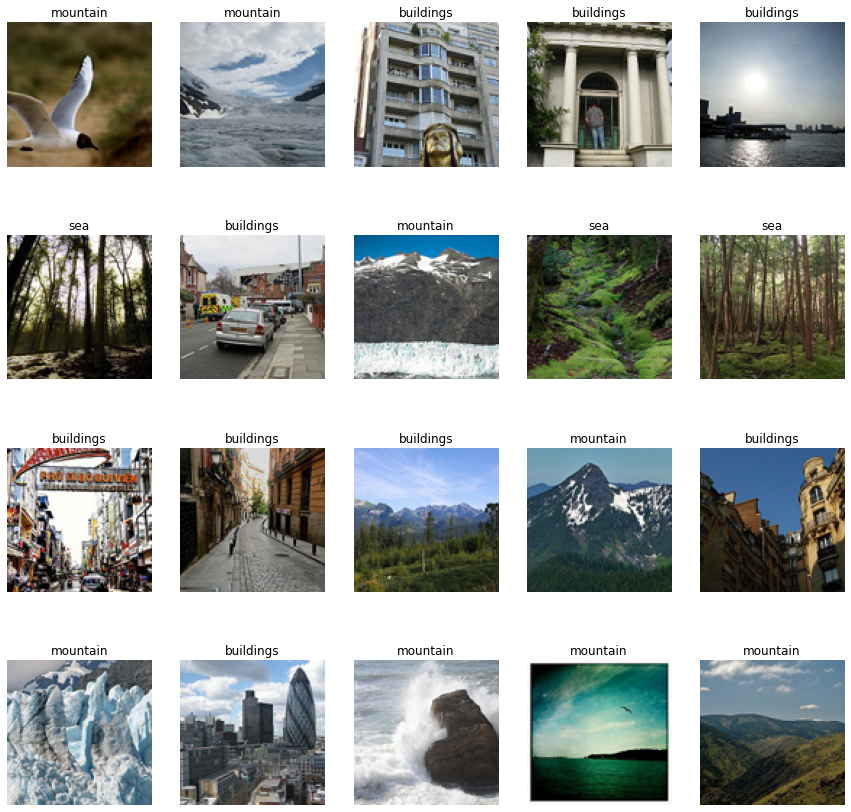

In [ ]:
plt.figure(figsize=(15,15))
for i in range(20):
  plt.subplot(4,5,i+1)
  plt.imshow(submmit[i], "gray")
  plt.axis("off")
  plt.title(to_label(pred[i]))
plt.show

前処理した画像を表示する

In [12]:
path = "/content/drive/My Drive/task/intel-image-classification-dataset/dataset/buildings"
files = glob.glob(path + '/*')

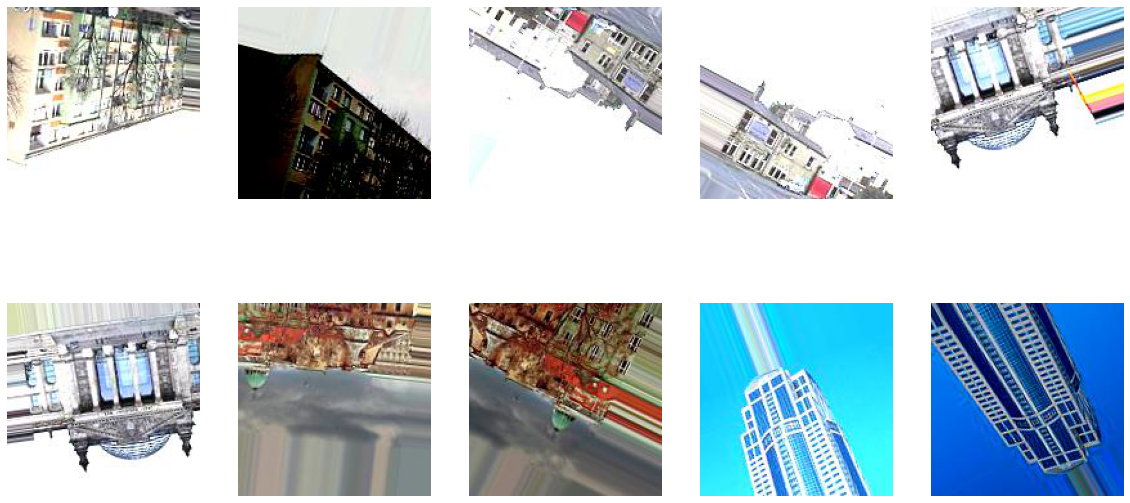

In [14]:
plt.figure(figsize=(20,10))
for i in range(10):
  plt.subplot(2,5,i+1)
  im = Image.open(files[i])
  image = np.asarray(im)
  plt.imshow(image)
  plt.axis("off")
  plt.show